# `Adv. linear regression model with multiple Feature`

### `import libraries`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy, math


### `import dataset`

In [2]:
data = pd.read_csv("./data/houses.csv")
df = copy.deepcopy(data)

features = ['Size_(sqft)', 'Number_of_Bedrooms', 'Number_of_floors', 'Age_of_Home']
X_train = np.array(df[features])
y_train = np.array(df['Price_(1000s dollars)'])

### `functions`

In [3]:
def r2_score(y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    ss_total = np.sum((y - np.mean(y)) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2


#### z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2
\end{align}
$$

In [4]:
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)
    sigma  = np.std(X, axis=0)
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

##### $$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

In [5]:
def compute_model_output(x, w, b):
    p = np.dot(x, w) + b 
    return p

##### $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

In [6]:
def compute_cost(X, y, w, b): 
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return cost

##### $$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}\\\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})\\
\end{align}
$$

In [7]:
def compute_gradient(X, y, w, b): 
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):                         
            dj_dw[j] += err * X[i, j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
        
    return dj_db, dj_dw

In [8]:
def gradient_descent(X, y, cost_function=compute_cost, compute_gradient=compute_gradient, num_iters=10000, alpha=1e-2): 
    J_history = []
    p_history = []
    w = np.zeros(X.shape[1])
    b = 0
    
    for i in range(num_iters):
        dj_db,dj_dw = compute_gradient(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 1000000:
            J_history.append( cost_function(X, y, w, b))
            p_history.append([w,b])

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history, p_history

### `exploring dataset`

In [9]:
df.sample(3)

,Size_(sqft),Number_of_Bedrooms,Number_of_floors,Age_of_Home,Price_(1000s dollars)
39,1096.0,2.0,2.0,97.0,158.0
65,1603.0,3.0,2.0,29.0,351.8
55,1208.0,2.0,1.0,14.0,390.8


In [10]:
df.isna().sum()

Size_(sqft)              0
Number_of_Bedrooms       0
Number_of_floors         0
Age_of_Home              0
Price_(1000s dollars)    0
dtype: int64

In [11]:
X_train[:3], y_train[:3]

(array([[9.520e+02, 2.000e+00, 1.000e+00, 6.500e+01],
        [1.244e+03, 3.000e+00, 1.000e+00, 6.400e+01],
        [1.947e+03, 3.000e+00, 2.000e+00, 1.700e+01]]),
 array([271.5, 300. , 509.8]))

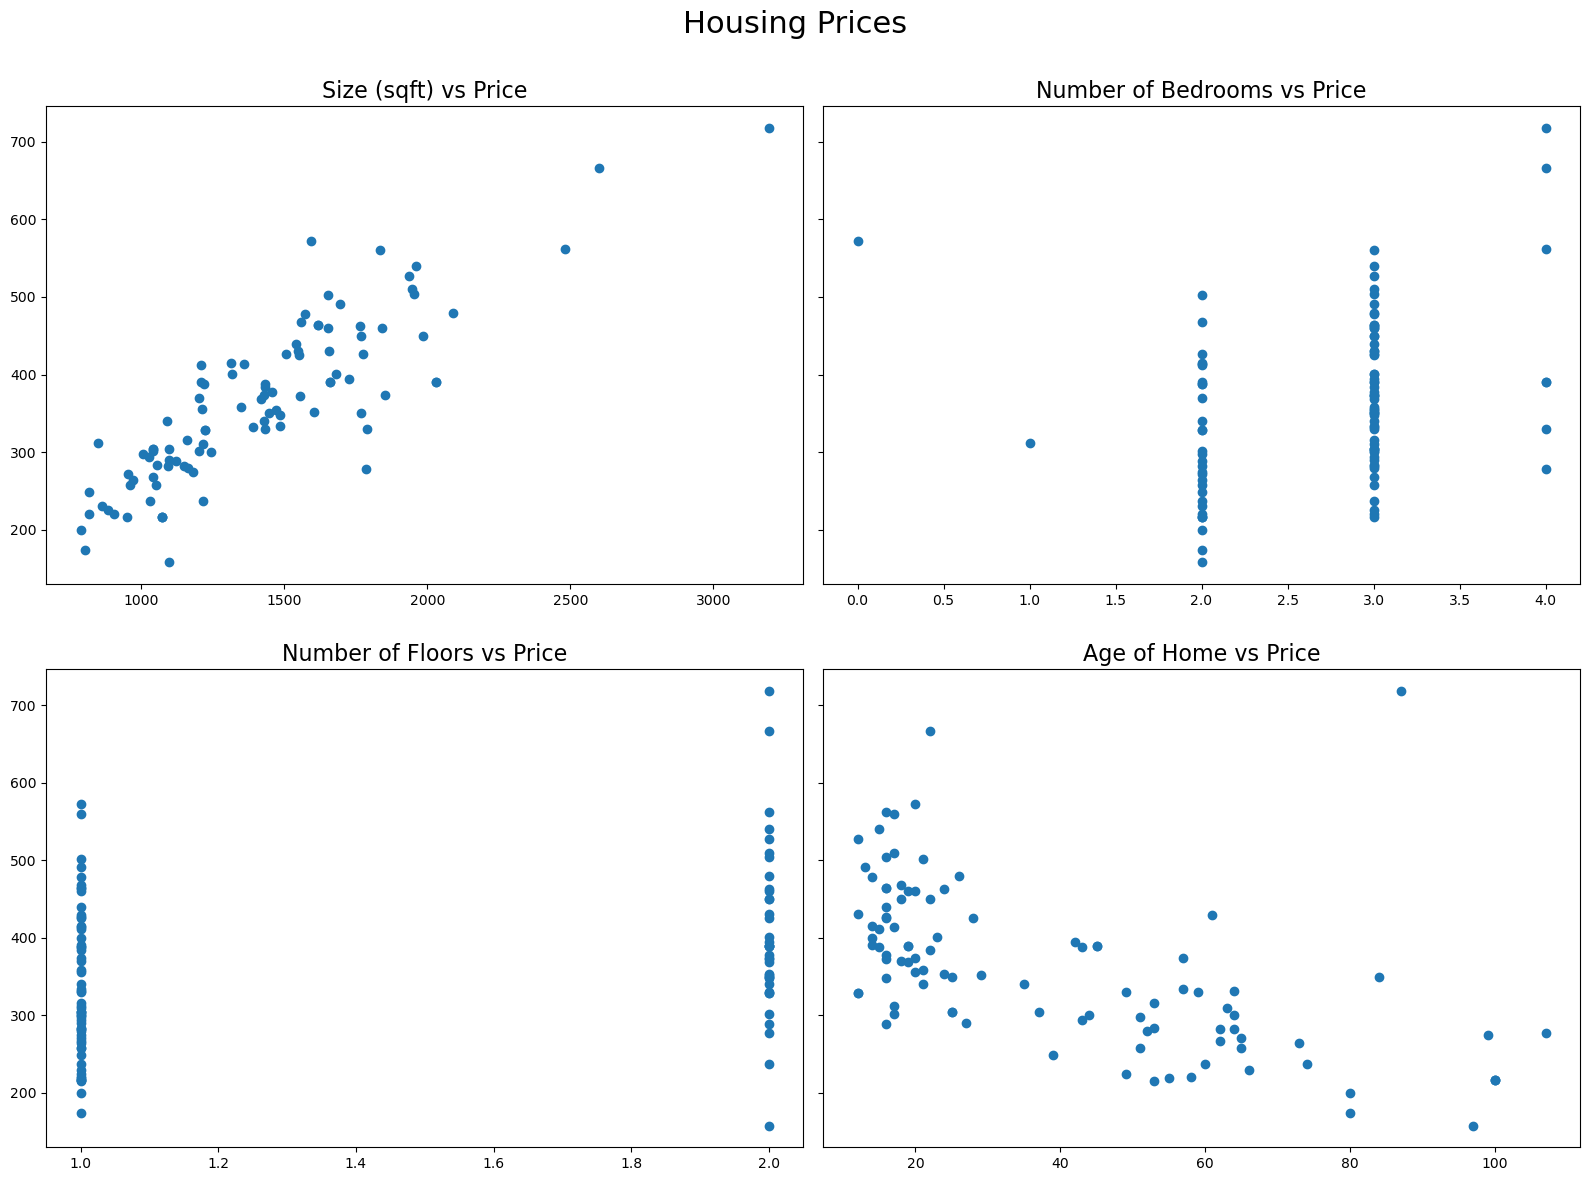

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharey=True)

ax[0,0].scatter(X_train[:,0], y_train)
ax[0,0].set_title('Size (sqft) vs Price', fontsize=16)

ax[0,1].scatter(X_train[:,1], y_train)
ax[0,1].set_title('Number of Bedrooms vs Price', fontsize=16)

ax[1,0].scatter(X_train[:,2], y_train)
ax[1,0].set_title('\nNumber of Floors vs Price', fontsize=16)

ax[1,1].scatter(X_train[:,3], y_train)
ax[1,1].set_title('\nAge of Home vs Price', fontsize=16)

plt.tight_layout()
fig.suptitle('Housing Prices', fontsize=22)
fig.subplots_adjust(top=0.9)
plt.show()

### `feature scaling`

In [13]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)

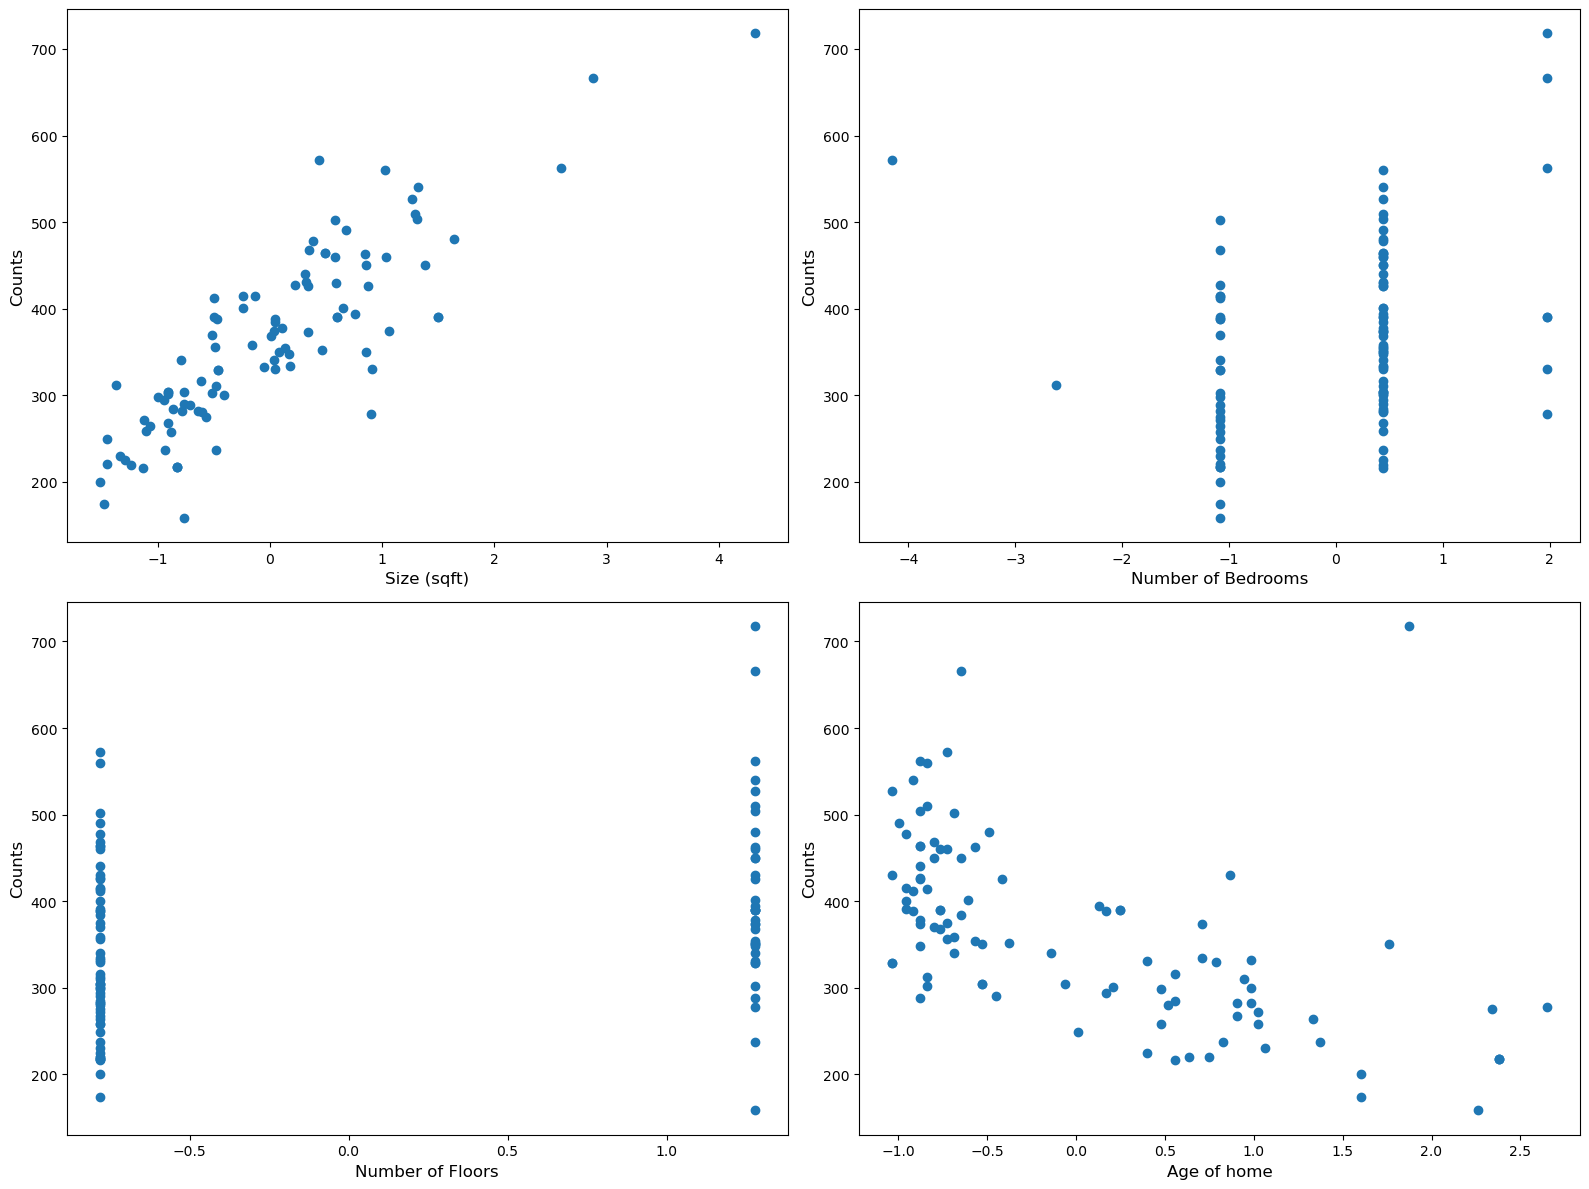

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

ax[0,0].scatter(X_norm[:,0], y_train, marker='o')
ax[0,0].set_xlabel('Size (sqft)', fontsize=12)
ax[0,0].set_ylabel('Counts', fontsize=12)

ax[0,1].scatter(X_norm[:,1], y_train, marker='o', label='target')
ax[0,1].set_xlabel('Number of Bedrooms', fontsize=12)
ax[0,1].set_ylabel('Counts', fontsize=12)

ax[1,0].scatter(X_norm[:,2], y_train, marker='o', label='target')
ax[1,0].set_xlabel('Number of Floors', fontsize=12)
ax[1,0].set_ylabel('Counts', fontsize=12)

ax[1,1].scatter(X_norm[:,3], y_train, marker='o', label='target')
ax[1,1].set_xlabel('Age of home', fontsize=12)
ax[1,1].set_ylabel('Counts', fontsize=12)

plt.tight_layout()
plt.show()

### `run gradient descent`

In [15]:
w_final, b_final, J_hist, p_hist = gradient_descent(X_norm, y_train)
print(f"w, b found by gradient descent: {w_final},{b_final:0.2f}")

Iteration    0: Cost 69584.12   
Iteration 1000: Cost   222.08   
Iteration 2000: Cost   219.71   
Iteration 3000: Cost   219.71   
Iteration 4000: Cost   219.71   
Iteration 5000: Cost   219.71   
Iteration 6000: Cost   219.71   
Iteration 7000: Cost   219.71   
Iteration 8000: Cost   219.71   
Iteration 9000: Cost   219.71   
w, b found by gradient descent: [110.61335173 -21.47323884 -32.66070323 -37.77938362],362.24


In [16]:
p_list = []
for arr, val in p_hist:
    row = list(arr) + [val]
    p_list.append(row)

p_history = pd.DataFrame(p_list, columns=['w1', 'w2', 'w3', 'w4', 'b'])

In [17]:
def plotHistory(history, ylabel):
    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
    
    ax1.plot(history[:1000], lw=3)
    ax2.plot(history[1000:], lw=3)

    ax1.set_title(f"{ylabel} vs. iteration(start)")
    ax1.set_xlabel('iteration step')
    ax1.set_ylabel(ylabel)

    ax2.set_title(f"{ylabel} vs. iteration (end)")
    ax2.set_xlabel('iteration step')
    ax2.set_ylabel(ylabel) 
    
    plt.show()

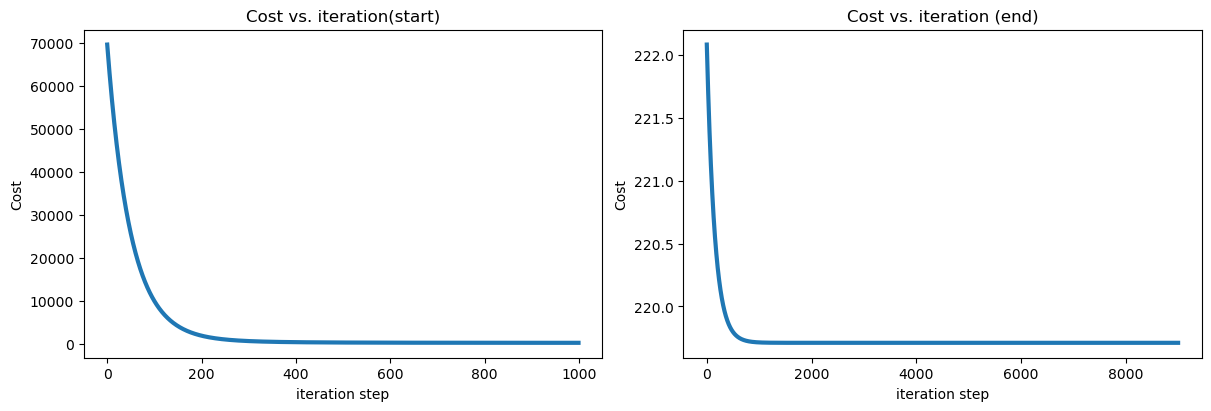

In [18]:
plotHistory(J_hist, 'Cost')

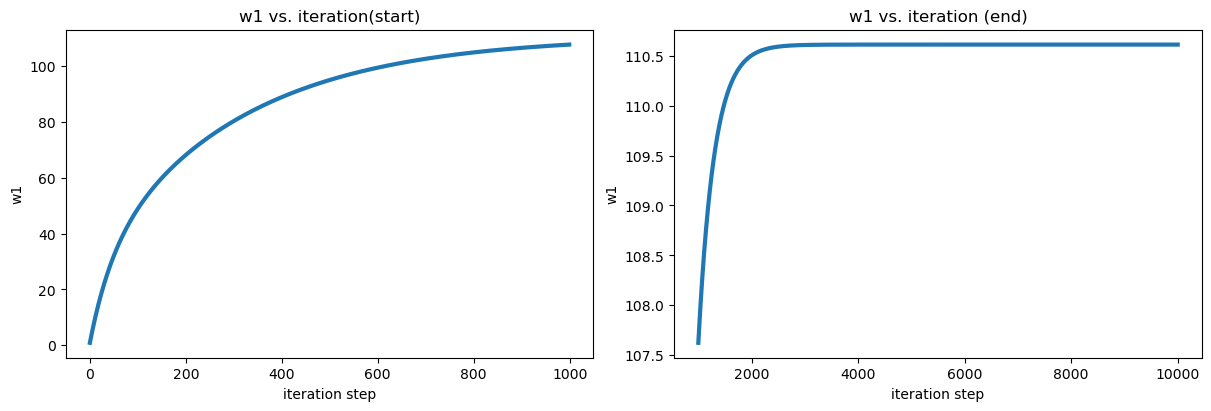

In [19]:
plotHistory(p_history.w1, 'w1')

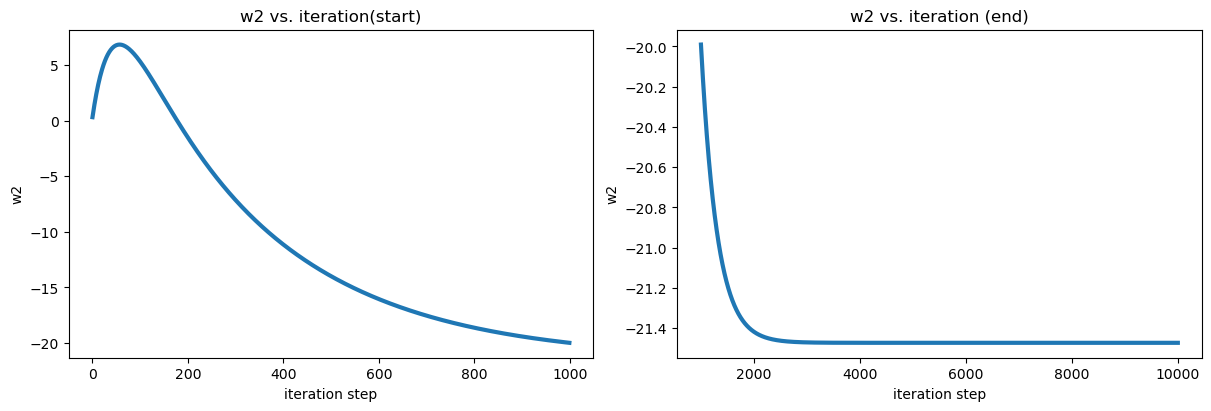

In [20]:
plotHistory(p_history.w2, 'w2')

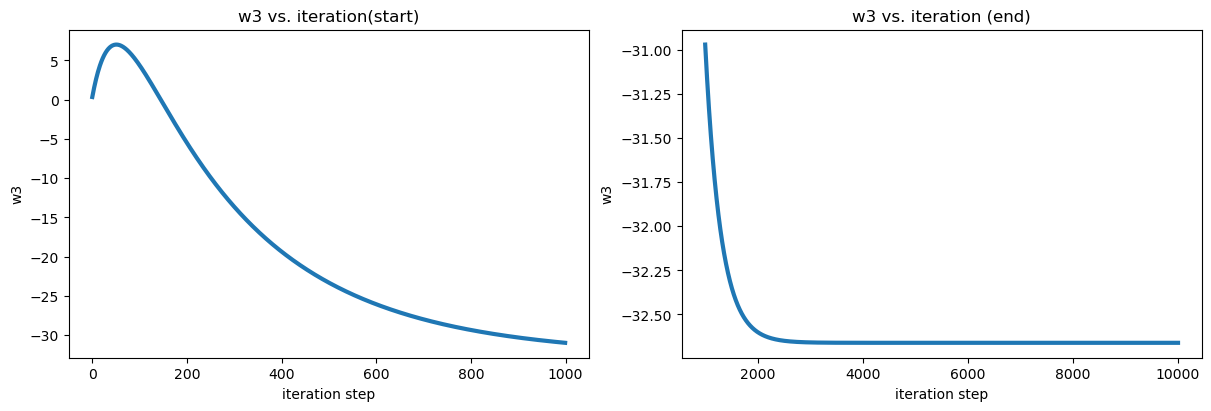

In [21]:
plotHistory(p_history.w3, 'w3')

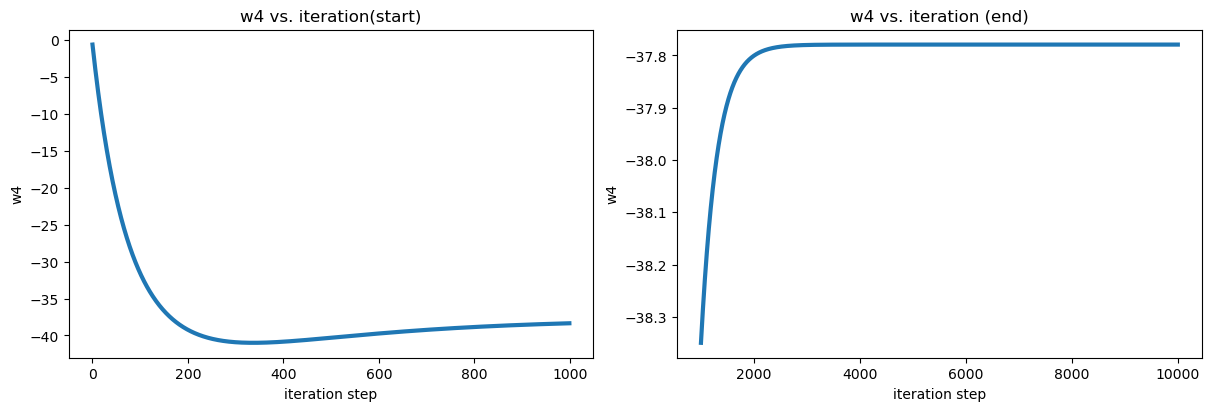

In [22]:
plotHistory(p_history.w4, 'w4')

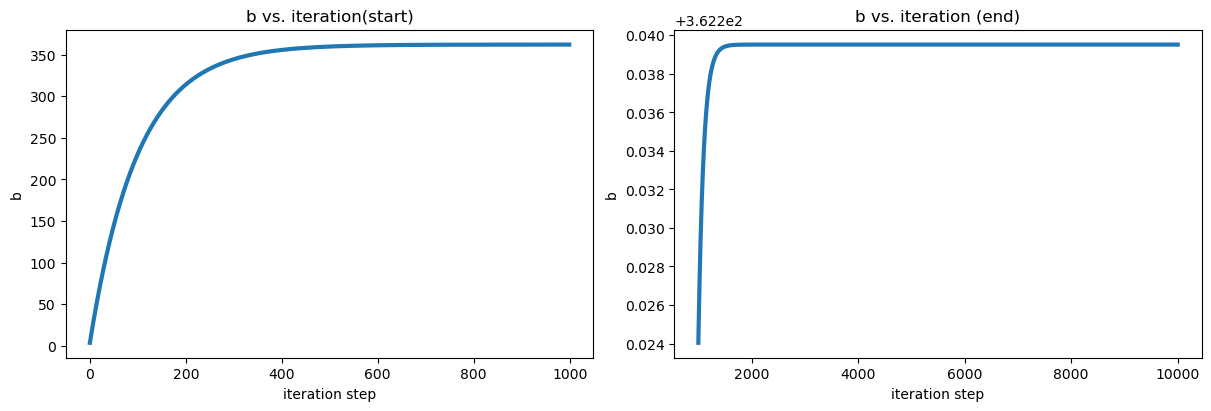

In [23]:
plotHistory(p_history.b, 'b')

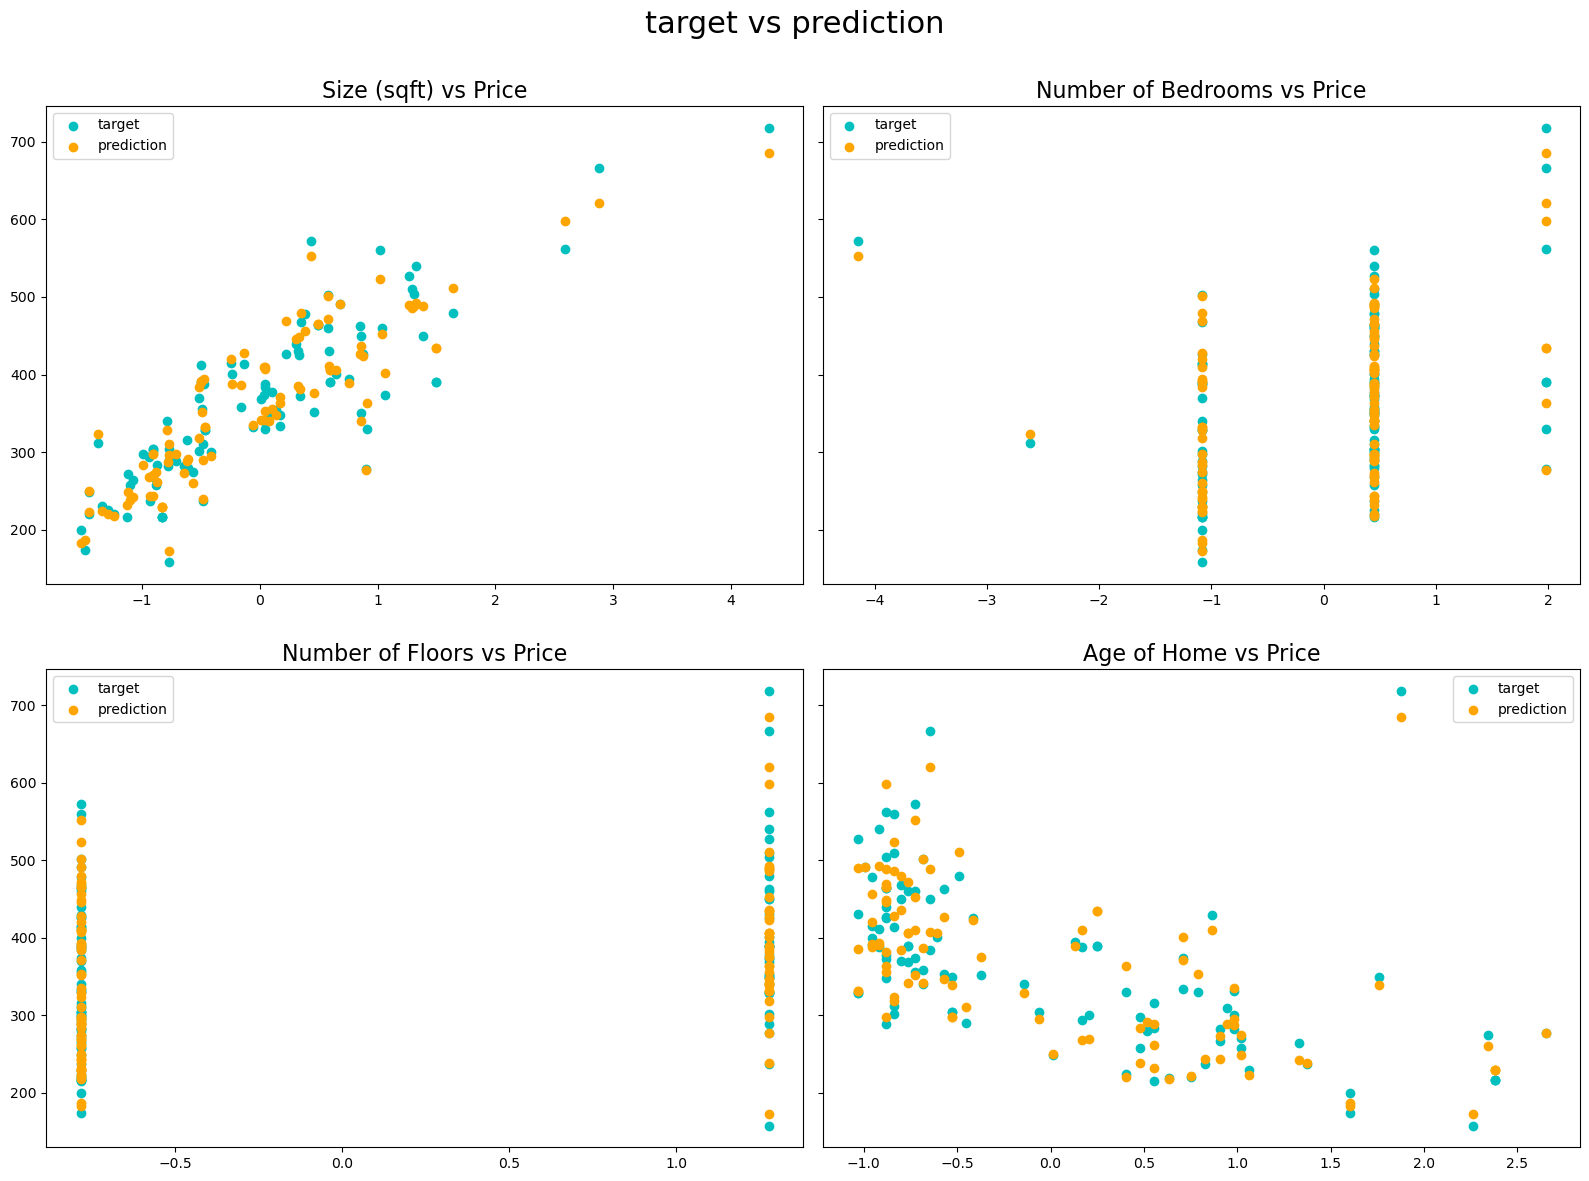

In [24]:
f_wb = compute_model_output(X_norm, w_final, b_final)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharey=True)

ax[0,0].scatter(X_norm[:,0], y_train, marker='o', c='c', label='target')
ax[0,0].scatter(X_norm[:,0], f_wb, marker='o', c='orange', label='prediction')
ax[0,0].set_title('Size (sqft) vs Price', fontsize=16)
ax[0,0].legend()

ax[0,1].scatter(X_norm[:,1], y_train, marker='o', c='c', label='target')
ax[0,1].scatter(X_norm[:,1], f_wb, marker='o', c='orange', label='prediction')
ax[0,1].set_title('Number of Bedrooms vs Price', fontsize=16)
ax[0,1].legend()

ax[1,0].scatter(X_norm[:,2], y_train, marker='o', c='c', label='target')
ax[1,0].scatter(X_norm[:,2], f_wb, marker='o', c='orange', label='prediction')
ax[1,0].set_title('\nNumber of Floors vs Price', fontsize=16)
ax[1,0].legend()

ax[1,1].scatter(X_norm[:,3], y_train, marker='o', c='c', label='target')
ax[1,1].scatter(X_norm[:,3], f_wb, marker='o', c='orange', label='prediction')
ax[1,1].set_title('\nAge of Home vs Price', fontsize=16)
ax[1,1].legend()

plt.tight_layout()
fig.suptitle('target vs prediction', fontsize=22)
fig.subplots_adjust(top=0.9)
plt.show()

### `score`

In [25]:
pred = []
for i in range(X_norm.shape[0]):
    f_wb = np.dot(w_final, X_norm[i]) + b_final
    pred.append(f_wb)

In [26]:
pd.DataFrame([y_train, pred], index=['y', 'y_hat'])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
y,271.500000,300.000000,509.800000,394.000000,540.000000,415.000000,230.000000,560.000000,294.000000,718.200000,...,174.000000,340.000000,430.00000,440.000000,216.00000,329.00000,388.000000,390.000000,356.000000,257.800000
y_hat,248.655918,295.580459,485.816895,389.610357,491.967628,420.528114,223.574505,523.316263,267.845098,685.004474,...,186.691806,341.210781,410.54293,445.613334,232.26084,332.01743,409.705492,405.865395,351.460109,274.955828


In [27]:
score = r2_score(y_train, pred)
print(f'{score:.3f}')

0.959
